In [14]:
import pandas as pd
import feather
import datetime as dt

In [41]:
%matplotlib inline

In [3]:
logs = feather.read_dataframe('nba_xmetrics/game_logs.feather')

In [4]:
type(logs)

pandas.core.frame.DataFrame

In [5]:
logs.head()

,Date,Tm,Opp,Result,MP,h_FG,h_FGA,h_FG%,h_2P,h_2PA,...,v_STL%,v_BLK%,v_TOV%,v_ORtg,v_FTr,v_3PAr,v_TS%,v_eFG%,v_FT/FGA,season
0,1983-10-28,CLE,NYK,L 106-113,240,39,78,0.500,37,75,...,9.9,4.0,15.6,124.5,0.397,0.077,0.617,0.590,0.269,1984
1,1983-10-28,DEN,UTA,W 139-125,240,55,102,0.539,55,102,...,5.5,7.8,5.8,115.6,0.320,0.020,0.548,0.500,0.250,1984
2,1983-10-28,DET,BOS,W 127-121,240,42,100,0.420,42,99,...,8.1,6.1,17.3,108.7,0.512,0.047,0.574,0.471,0.465,1984
3,1983-10-28,KCK,LAL,L 107-117,240,45,93,0.484,45,93,...,5.8,5.4,14.5,113.1,0.281,0.000,0.585,0.551,0.213,1984
4,1983-10-28,MIL,IND,W 104-83,240,42,97,0.433,42,96,...,6.8,4.2,14.4,81.0,0.202,0.000,0.366,0.337,0.125,1984


In [6]:
logs.columns

Index(['Date', 'Tm', 'Opp', 'Result', 'MP', 'h_FG', 'h_FGA', 'h_FG%', 'h_2P',
       'h_2PA', 'h_2P%', 'h_3P', 'h_3PA', 'h_3P%', 'h_FT', 'h_FTA', 'h_FT%',
       'h_PTS', 'h_ORB%', 'h_TRB%', 'h_AST%', 'h_STL%', 'h_BLK%', 'h_TOV%',
       'h_ORtg', 'h_FTr', 'h_3PAr', 'h_TS%', 'h_eFG%', 'h_FT/FGA', 'v_FG',
       'v_FGA', 'v_FG%', 'v_2P', 'v_2PA', 'v_2P%', 'v_3P', 'v_3PA', 'v_3P%',
       'v_FT', 'v_FTA', 'v_FT%', 'v_PTS', 'v_ORB%', 'v_TRB%', 'v_AST%',
       'v_STL%', 'v_BLK%', 'v_TOV%', 'v_ORtg', 'v_FTr', 'v_3PAr', 'v_TS%',
       'v_eFG%', 'v_FT/FGA', 'season'],
      dtype='object')

In [7]:
logs.shape

(39889, 56)

In [8]:
logs.dtypes

Date        datetime64[ns]
Tm                  object
Opp                 object
Result              object
MP                   int64
h_FG                 int64
h_FGA                int64
h_FG%              float64
h_2P                 int64
h_2PA                int64
h_2P%              float64
h_3P                 int64
h_3PA                int64
h_3P%              float64
h_FT                 int64
h_FTA                int64
h_FT%              float64
h_PTS                int64
h_ORB%             float64
h_TRB%             float64
h_AST%             float64
h_STL%             float64
h_BLK%             float64
h_TOV%             float64
h_ORtg             float64
h_FTr              float64
h_3PAr             float64
h_TS%              float64
h_eFG%             float64
h_FT/FGA           float64
v_FG                 int64
v_FGA                int64
v_FG%              float64
v_2P                 int64
v_2PA                int64
v_2P%              float64
v_3P                 int64
v

In [9]:
logs['Date'].max()

Timestamp('2018-11-27 00:00:00')

In [11]:
ts = logs['Date'][0]

In [12]:
ts.year

1983

In [23]:
det_2017 = logs[(logs['Date'].dt.year==2017) & ((logs['Tm']=='DET') | (logs['Opp']=='DET'))].copy()

In [24]:
det_2017.shape

(82, 56)

In [25]:
det_2017.head()

,Date,Tm,Opp,Result,MP,h_FG,h_FGA,h_FG%,h_2P,h_2PA,...,v_STL%,v_BLK%,v_TOV%,v_ORtg,v_FTr,v_3PAr,v_TS%,v_eFG%,v_FT/FGA,season
37633,2017-01-01,MIA,DET,L 98-107,240,35,77,0.455,21,51,...,7.5,9.8,11.1,114.9,0.256,0.256,0.559,0.541,0.163,2017
37646,2017-01-03,DET,IND,L 116-121,240,48,97,0.495,38,68,...,7.6,10.3,11.2,131.9,0.405,0.216,0.694,0.642,0.351,2017
37660,2017-01-05,DET,CHO,W 115-114,240,39,97,0.402,29,69,...,4.0,7.2,4.5,114.4,0.374,0.286,0.538,0.462,0.330,2017
37687,2017-01-08,POR,DET,L 124-125 (2OT),290,51,98,0.520,36,63,...,12.7,4.8,7.5,113.0,0.114,0.238,0.567,0.552,0.086,2017
37697,2017-01-10,SAC,DET,W 100-94,240,32,73,0.438,19,50,...,13.5,18.0,11.9,105.7,0.195,0.329,0.528,0.512,0.122,2017


In [26]:
det_2017.reset_index(drop=True)

,Date,Tm,Opp,Result,MP,h_FG,h_FGA,h_FG%,h_2P,h_2PA,...,v_STL%,v_BLK%,v_TOV%,v_ORtg,v_FTr,v_3PAr,v_TS%,v_eFG%,v_FT/FGA,season
0,2017-01-01,MIA,DET,L 98-107,240,35,77,0.455,21,51,...,7.5,9.8,11.1,114.9,0.256,0.256,0.559,0.541,0.163,2017
1,2017-01-03,DET,IND,L 116-121,240,48,97,0.495,38,68,...,7.6,10.3,11.2,131.9,0.405,0.216,0.694,0.642,0.351,2017
2,2017-01-05,DET,CHO,W 115-114,240,39,97,0.402,29,69,...,4.0,7.2,4.5,114.4,0.374,0.286,0.538,0.462,0.330,2017
3,2017-01-08,POR,DET,L 124-125 (2OT),290,51,98,0.520,36,63,...,12.7,4.8,7.5,113.0,0.114,0.238,0.567,0.552,0.086,2017
4,2017-01-10,SAC,DET,W 100-94,240,32,73,0.438,19,50,...,13.5,18.0,11.9,105.7,0.195,0.329,0.528,0.512,0.122,2017
5,2017-01-12,GSW,DET,W 127-107,240,50,89,0.562,35,60,...,9.5,6.7,16.4,101.1,0.227,0.318,0.553,0.523,0.170,2017
6,2017-01-13,UTA,DET,W 110-77,240,43,80,0.538,27,49,...,5.5,8.2,13.5,84.6,0.211,0.224,0.464,0.434,0.145,2017
7,2017-01-15,LAL,DET,L 97-102,240,36,83,0.434,30,57,...,6.2,10.5,6.4,105.4,0.168,0.263,0.500,0.479,0.116,2017
8,2017-01-18,DET,ATL,W 118-95,240,45,91,0.495,35,66,...,1.1,6.1,11.3,100.2,0.474,0.321,0.504,0.423,0.372,2017
9,2017-01-21,DET,WAS,W 113-112,240,43,87,0.494,32,59,...,11.8,5.1,9.4,110.2,0.363,0.286,0.531,0.473,0.286,2017


In [28]:
det_2017['ortg'] =  det_2017['h_ORtg'].multiply(det_2017['Tm']=='DET') + det_2017['v_ORtg'].multiply(det_2017['Opp']=='DET')

In [31]:
det_2017[['Tm', 'Opp', 'h_ORtg', 'v_ORtg', 'ortg']].head()

,Tm,Opp,h_ORtg,v_ORtg,ortg
37633,MIA,DET,105.2,114.9,114.9
37646,DET,IND,126.4,131.9,126.4
37660,DET,CHO,115.4,114.4,115.4
37687,POR,DET,112.1,113.0,113.0
37697,SAC,DET,112.4,105.7,105.7


In [55]:
det_2017_simple = det_2017[['ortg']].reset_index(drop=True).copy()

In [56]:
type(det_2017_simple)

pandas.core.frame.DataFrame

In [60]:
det_2017_simple.index.name = 'game'

In [61]:
det_2017_simple.head()

,ortg
game,
0,114.9
1,126.4
2,115.4
3,113.0
4,105.7


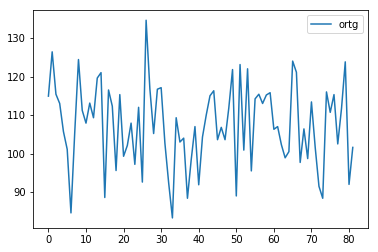

In [58]:
det_2017_simple.plot()

In [63]:
df = det_2017_simple

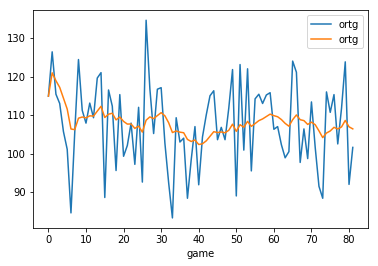

In [67]:
ax = df.plot()
df.ewm(alpha=0.1).mean().plot(ax=ax)

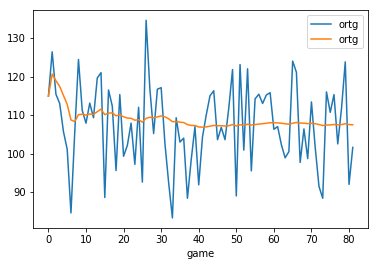

In [76]:
ax = df.plot()
df.expanding().mean().plot(ax=ax)

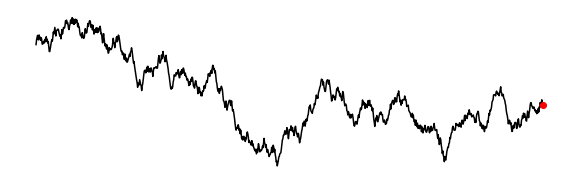

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# create some random data
x = np.cumsum(np.random.rand(1000)-0.5)

# plot it
fig, ax = plt.subplots(1,1,figsize=(10,3))
plt.plot(x, color='k')
plt.plot(len(x)-1, x[-1], color='r', marker='o')

# remove all the axes
for k,v in ax.spines.items():
    v.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

#show it
plt.show()

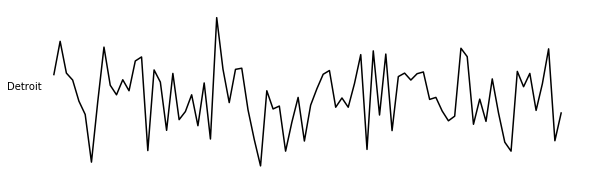

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# create some random data
x = df['ortg']

# plot it
fig, ax = plt.subplots(1,1,figsize=(10,3))
plt.plot(x, color='k')
# plt.plot(len(x)-1, x[len(x)-1], color='r', marker='o')

# remove all the axes
for k,v in ax.spines.items():
    v.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.ylabel('Detroit', rotation=0)

#show it
plt.show()

In [94]:
def get_ratings(df, team):
    team_df = df[(df['Tm']==team) | (df['Opp']==team)].copy()
    return team_df['h_ORtg'].multiply(team_df['Tm']==team) + team_df['v_ORtg'].multiply(team_df['Opp']==team)

In [95]:
df2017 = logs[logs['Date'].dt.year==2017]

In [96]:
teams = list(df2017['Tm'].unique())

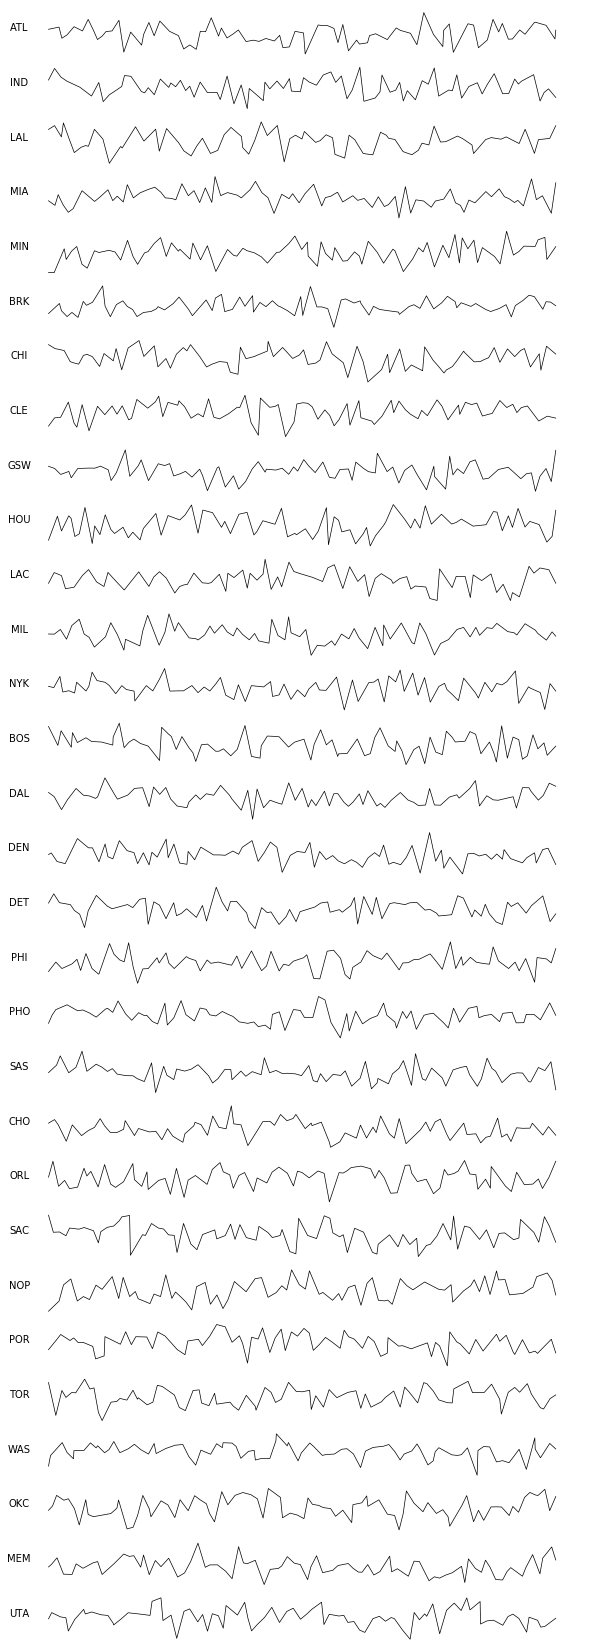

In [114]:
fig, axs = plt.subplots(30, figsize=(10, 30))

for ix, team in enumerate(teams):
    x = get_ratings(df2017, team)

    # plot it
    ax = axs[ix]
    ax.plot(x, color='k', linewidth=0.7)
    ax.set_ylabel(team, rotation=0)


# remove all the axes
for ax in axs.flat:
    for k,v in ax.spines.items():
        v.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [115]:
fig.savefig('sparklines.png')